In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
CO2data = pd.read_csv('co2_daily_mlo.txt', sep="\t",skiprows=34, header=None)
CO2data[['year' , 'month' ,'date' , 'decimal' , 'co2_val']] = CO2data[0].str.split(' ', expand=True).drop(columns=[0,1,3,4,6,8,10,11,12,14])
CO2data.drop(columns=[0,'decimal'], inplace=True)

In [3]:
X = []
y = []
n = len(CO2data)
for i in range(n-5):
    X.append(CO2data.iloc[i:i+5]['co2_val'].values)
    y.append(CO2data.iloc[i+5]['co2_val'])

X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [4]:
X.replace('', np.nan, inplace=True)
y.replace('', np.nan, inplace=True)

In [5]:
X_na_index = np.any(X.isna(), axis=1).values
y_na_index = y.isna().values.ravel()
index_to_remove = np.logical_or(X_na_index, y_na_index)
X = X[~index_to_remove]
y = y[~index_to_remove]

In [6]:
X

,0,1,2,3,4
0,333.46,333.64,333.50,333.21,333.05
1,333.64,333.50,333.21,333.05,333.32
2,333.50,333.21,333.05,333.32,332.79
3,333.21,333.05,333.32,332.79,332.43
4,333.05,333.32,332.79,332.43,332.60
...,...,...,...,...,...
15543,426.79,426.62,426.32,428.18,428.02
15544,426.62,426.32,428.18,428.02,426.67
15559,426.62,426.82,426.78,427.44,427.19
15560,426.82,426.78,427.44,427.19,426.99


In [7]:
y

,0
0,333.32
1,332.79
2,332.43
3,332.60
4,333.30
...,...
15543,426.67
15544,426.35
15559,426.99
15560,427.97


In [8]:
n = len(X)
X_train,X_test = X.iloc[:int(0.7*n)],X.iloc[int(0.7*n):]
y_train,y_test = y.iloc[:int(0.7*n)],y.iloc[int(0.7*n):]
X_train = X_train.astype(float).to_numpy()
y_train = y_train.astype(float).to_numpy().ravel()
X_test = X_test.astype(float).to_numpy()
y_test = y_test.astype(float).to_numpy().ravel()
# y_test = y_test.values.ravel()
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4569, 5), (1959, 5), (4569,), (1959,))

In [9]:
y_train

array([333.32, 332.79, 332.43, ..., 388.44, 390.11, 390.05])

In [10]:
res = LinearRegression()

In [11]:
res.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = res.predict(X_test)

y_pred = y_pred.ravel()


rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
print(rmse)
print(mape)
print(r2)

0.6378025147029501
0.0010568531119826228
0.9961259705963977


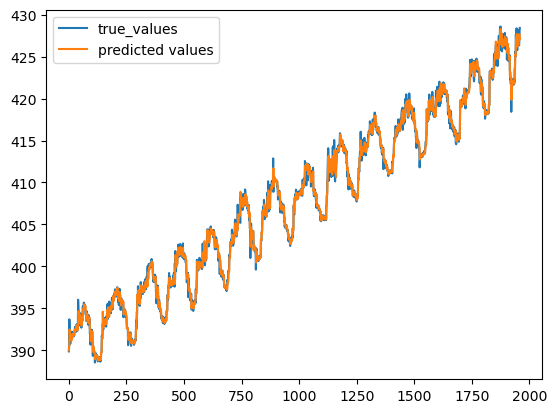

In [14]:
plt.plot(y_test,label = 'true_values')
plt.plot(y_pred, label = 'predicted values')
plt.legend()
plt.show()

In [15]:
error = y_test - y_pred
error

array([-0.12795365, -0.01412651,  3.10936881, ..., -0.07708605,
        0.95128916,  0.80163685])

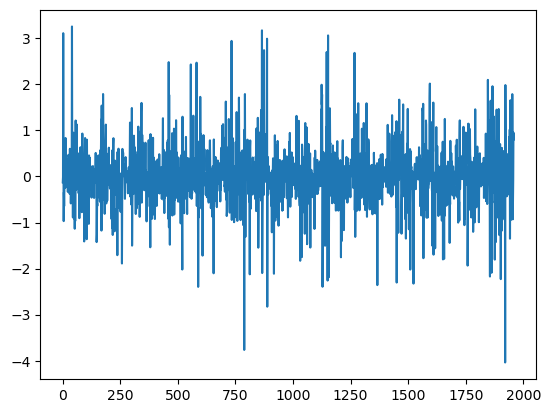

In [16]:
plt.plot(error)

In [17]:
std_error = np.std(error)
std_error

np.float64(0.6378023998649772)

In [25]:
y_pred_act = np.concatenate([y_train, y_pred])
y_test_act = np.concatenate([y_train, y_test])

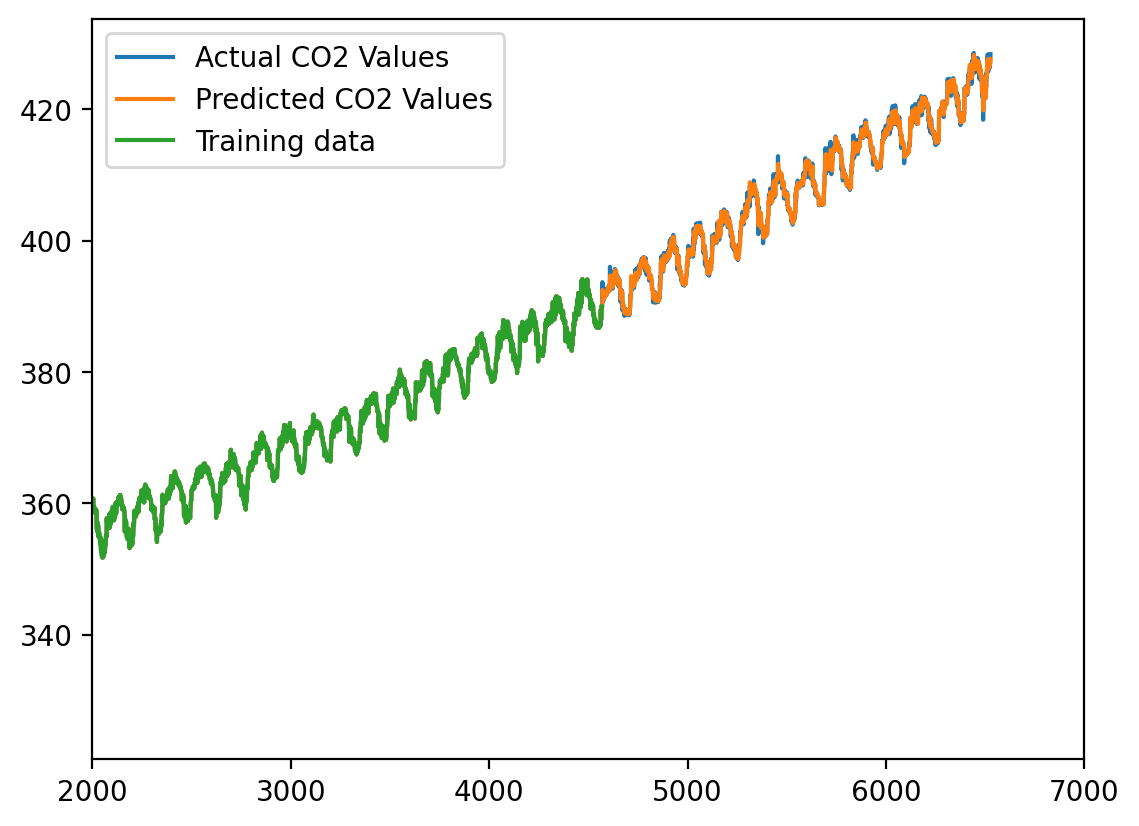

In [45]:
plt.figure(dpi=200)
plt.plot(y_test_act, label = 'Actual CO2 Values')
plt.plot(y_pred_act, label = 'Predicted CO2 Values')
plt.plot(y_train, label = 'Training data')
plt.xlim(2000,7000)
plt.legend()
plt.show()

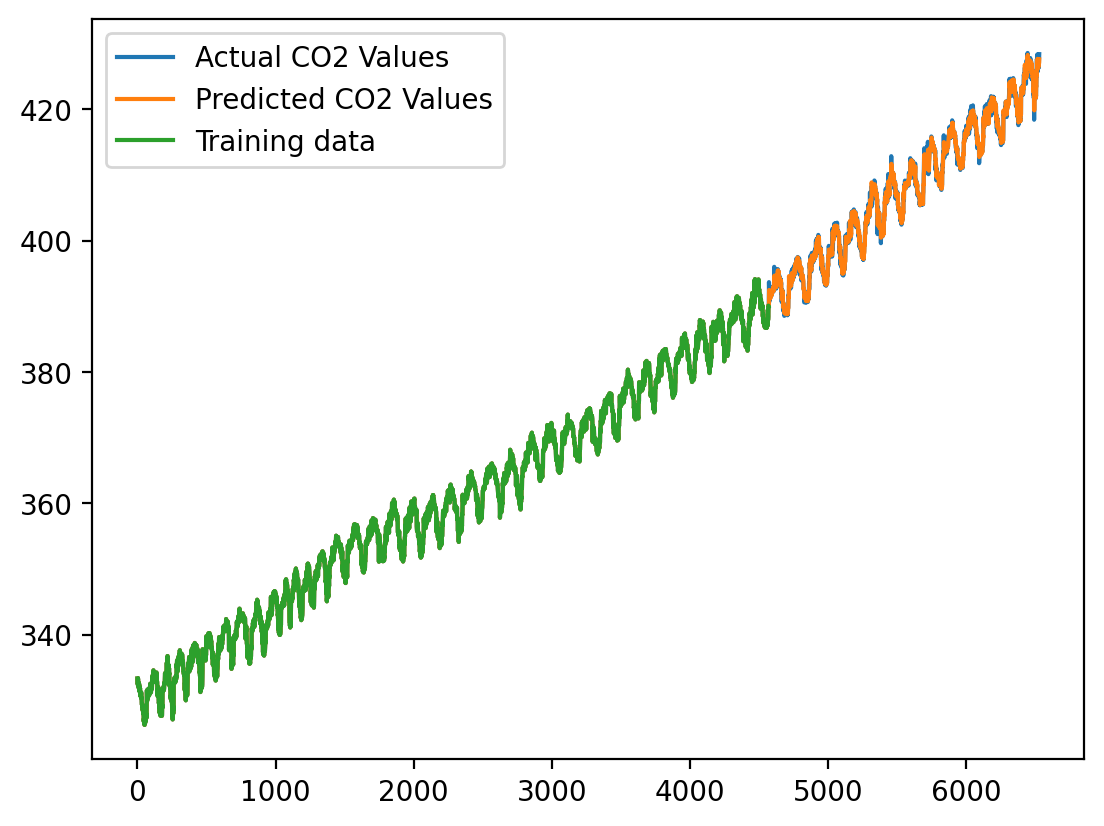

In [46]:
plt.figure(dpi=200)
plt.plot(y_test_act, label = 'Actual CO2 Values')
plt.plot(y_pred_act, label = 'Predicted CO2 Values')
plt.plot(y_train, label = 'Training data')
# plt.xlim(2000,7000)
plt.legend()
plt.show()